In [3]:
re_eeg_root_path = "/Users/athenasaghi/Desktop/Datasets/Rest-State/" ## local path
# re_eeg_root_path = "./Rest-State"

# pre_EC_ses1 , pre_EO_ses1 , pos_EC_ses1, pos_EO_ses1  each 3 min
# pre_EC_ses2 , pre_EO_ses2 , pos_EC_ses2, pos_EO_ses2  eaxh 3 min
# 

# Data Loading

In [4]:
import mne
import os
file = os.path.join(re_eeg_root_path, 'sub-001/ses-1/eeg/sub-001_ses-1_task-EyesClosed_acq-post_eeg.edf')
data = mne.io.read_raw_edf(file)

data

Extracting EDF parameters from /Users/athenasaghi/Desktop/Datasets/Rest-State/sub-001/ses-1/eeg/sub-001_ses-1_task-EyesClosed_acq-post_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"May 22, 2024 10:23:54 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,"64 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [37]:
# load_data(re_eeg_root_path,'F3',13,1,'EC','post')



/Users/athenasaghi/Desktop/Datasets/Rest-State/sub-013/ses-1/eeg/sub-013_ses-1_task-EyesClosed_acq-post_eeg.edf


In [5]:
data.info['ch_names'],len(data.info['ch_names'])

(['Fp1',
  'Fp2',
  'F7',
  'F3',
  'Fz',
  'F4',
  'F8',
  'FC5',
  'FC1',
  'FC2',
  'FC6',
  'T7',
  'C3',
  'Cz',
  'C4',
  'T8',
  'TP9',
  'CP5',
  'CP1',
  'CP2',
  'CP6',
  'TP10',
  'P7',
  'P3',
  'Pz',
  'P4',
  'P8',
  'PO9',
  'O1',
  'Oz',
  'O2',
  'PO10',
  'AF7',
  'AF3',
  'AF4',
  'AF8',
  'F5',
  'F1',
  'F2',
  'F6',
  'FT9',
  'FT7',
  'FC3',
  'FC4',
  'FT8',
  'FT10',
  'C5',
  'C1',
  'C2',
  'C6',
  'TP7',
  'CP3',
  'CPz',
  'CP4',
  'TP8',
  'P5',
  'P1',
  'P2',
  'P6',
  'PO7',
  'PO3',
  'POz',
  'PO4',
  'PO8',
  'Status'],
 65)

In [6]:
import matplotlib.pyplot as plt
f3_data ,f3_times = data['F3']
(f3_data)

array([[ 0.00249959,  0.00249894,  0.00249894, ..., -0.0106585 ,
        -0.0106585 , -0.0106585 ]])

In [7]:
data['F3']

(array([[ 0.00249959,  0.00249894,  0.00249894, ..., -0.0106585 ,
         -0.0106585 , -0.0106585 ]]),
 array([0.00000e+00, 1.00000e-03, 2.00000e-03, ..., 1.92997e+02,
        1.92998e+02, 1.92999e+02]))

# Multifractal analysis using MFDFA 

the length of the data is : 193000


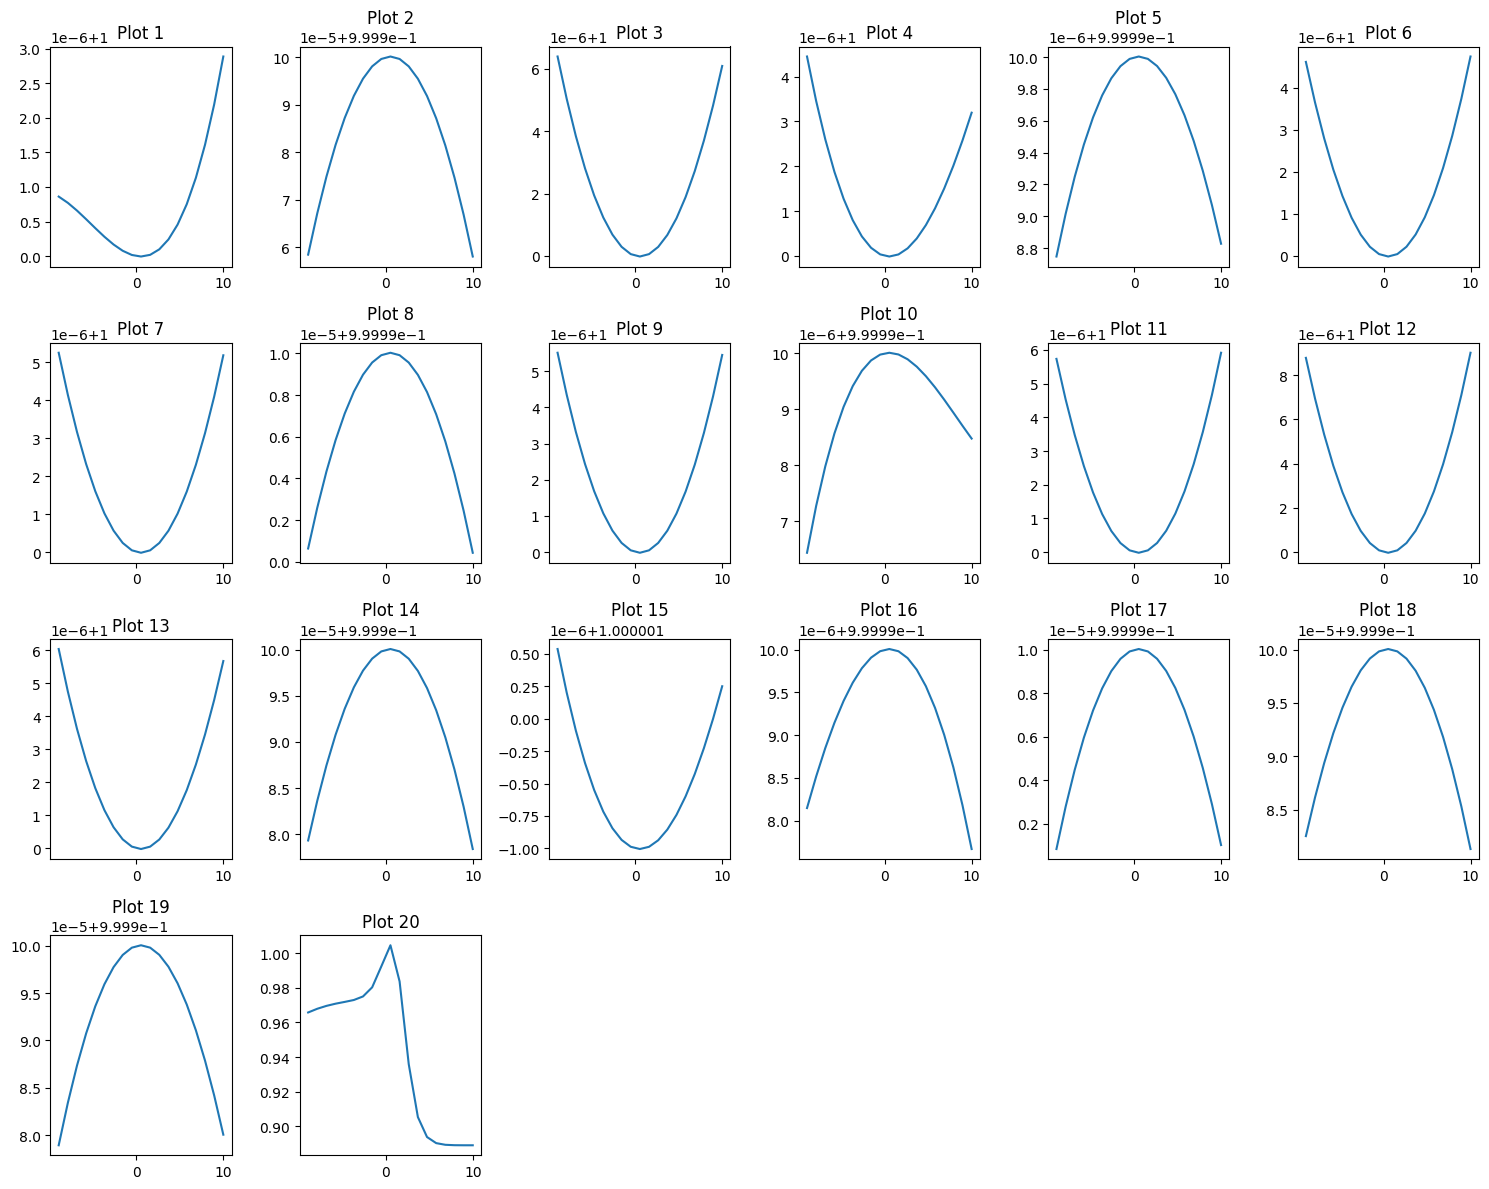

In [8]:
%load_ext autoreload
%autoreload 2
from MDFA import MDFA
import numpy as np

scales = [16, 32, 64, 128, 256, 512, 1024]

q =np.linspace(-10, 10, 20)
mdfa = MDFA(data,'F3',scales,q,True, 2, k=10000,fname='resteeg',dataset_name = 'Rest-StateEEG')


# Wavelet Transform Multifractal Analysis 
### PLBMF based 

In [9]:
! pip install git+https://github.com/neurospin/pymultifracs

  Cloning https://github.com/neurospin/pymultifracs to /private/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/pip-req-build-vlt884uk
  Running command git clone --filter=blob:none --quiet https://github.com/neurospin/pymultifracs /private/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/pip-req-build-vlt884uk
  Resolved https://github.com/neurospin/pymultifracs to commit c58aef9f1ac32a5256f83b4288ac5039397316c6
  Preparing metadata (setup.py) ... done


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context('notebook')

In [11]:
f3_data[0]

array([ 0.00249959,  0.00249894,  0.00249894, ..., -0.0106585 ,
       -0.0106585 , -0.0106585 ])

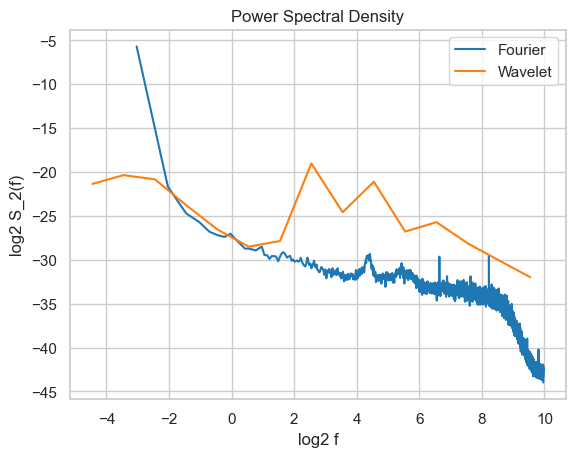

In [12]:
import sys
sys.path.append("../")
import pymultifracs.psd as psd

fs = 2000
sns.set_style('whitegrid')
psd.plot_psd(f3_data[0], fs, n_fft=2**14)
# plt.xlim((-4, 9))
# plt.ylim((-85, -70))

In [13]:
from pymultifracs.estimation import estimate_hmin
from pymultifracs.wavelet import wavelet_analysis

In [14]:
WT = wavelet_analysis(f3_data[0], j1=10, j2=14, p_exp=2)


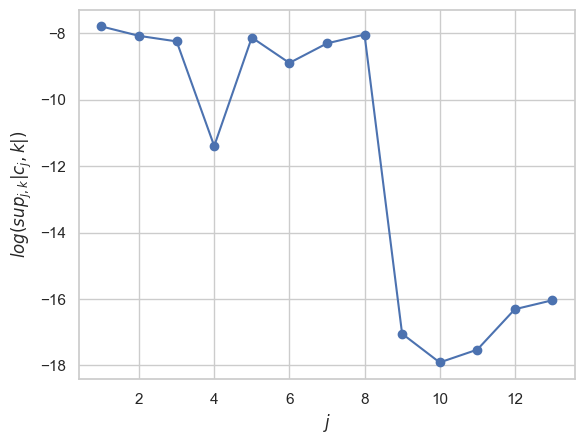

In [15]:
Jmax=len(WT.wt_coefs.values)
j_list = range(1,Jmax)
logsup = [np.log2(np.max(np.abs(WT.wt_coefs.values[i][~np.isnan(WT.wt_coefs.values[i])]))) for i in range(1,Jmax)]
plt.plot(j_list, logsup,'o-')
plt.xlabel('$j$')
plt.ylabel('$log(sup_{j,k} |c_j,k|)$')
plt.show()

La pente de la regression log-log entre 6 et 11 est de -2.311785381457079


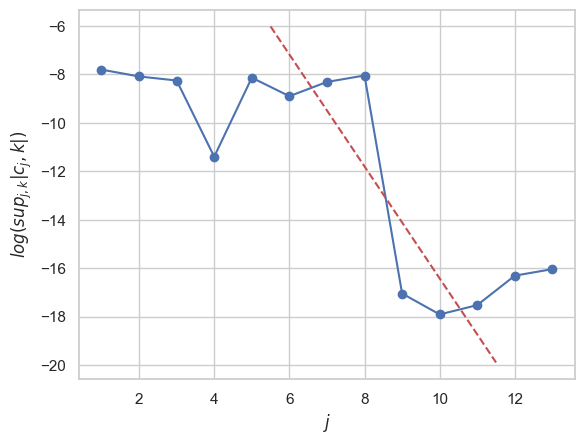

In [16]:
j1 = 6
j2 = 11
coef = np.polyfit(j_list[j1-1:j2],logsup[j1-1:j2], deg=1)
# estimate_hmin(WT.wt_coefs, scaling_ranges=[[1,Jmax-1]], weighted=True)
print(f'La pente de la regression log-log entre {j1} et {j2} est de {coef[0]}')

t = np.linspace(j1-0.5,j2+0.5,1000)
y = coef[0]*t+coef[1]

plt.plot(j_list, logsup,'o-')
plt.plot(t,y,'--r')
plt.xlabel('$j$')
plt.ylabel('$log(sup_{j,k} |c_j,k|)$')
plt.show()

In [17]:
from pymultifracs.utils import freq2scale, scale2freq
fs = 256
import pymultifracs.mfa as mfa
from pymultifracs.utils import build_q_log
dwt, lwt = mfa.mf_analysis_full(f3_data[0],
    scaling_ranges=[[6,11]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0,
    weighted=False
)
dwt_sf, dwt_cumul, dwt_mfs, hmin = dwt
dwt.hmin

/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/utils.py:87: RuntimeWarning: divide by zero encountered in power
  return np.power(array, exponent)
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/utils.py:76: RuntimeWarning: divide by zero encountered in reciprocal
  return array ** exponent
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/cumulants.py:265: RuntimeWarning: divide by zero encountered in log
  log_T_X_j = np.log(T_X_j)
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/mfspectrum.py:117: RuntimeWarning: invalid value encountered in divide
  R_j = temp / Z
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/mfspectrum.py:118: RuntimeWarning: divide by zero encountered in log2
  V[:, ind_j, :] = fixednansum(R_j * np.log2(mrq_values_j), axis=1)
/Users/athenasag

array([[-2.31178538]])

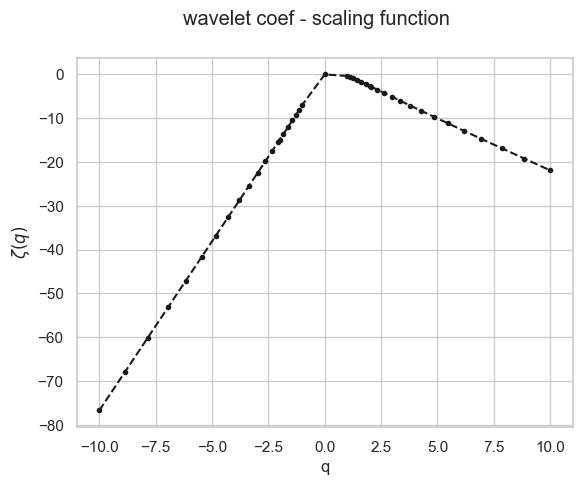

In [18]:
dwt_sf.plot_scaling()


In [19]:
dwt, lwt = mfa.mf_analysis_full(f3_data[0],
    scaling_ranges=[[6,11]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.5,
    weighted=False
)
dwt_sf, dwt_cumul, dwt_mfs, hmin = dwt
dwt.hmin

array([[-1.81178538]])

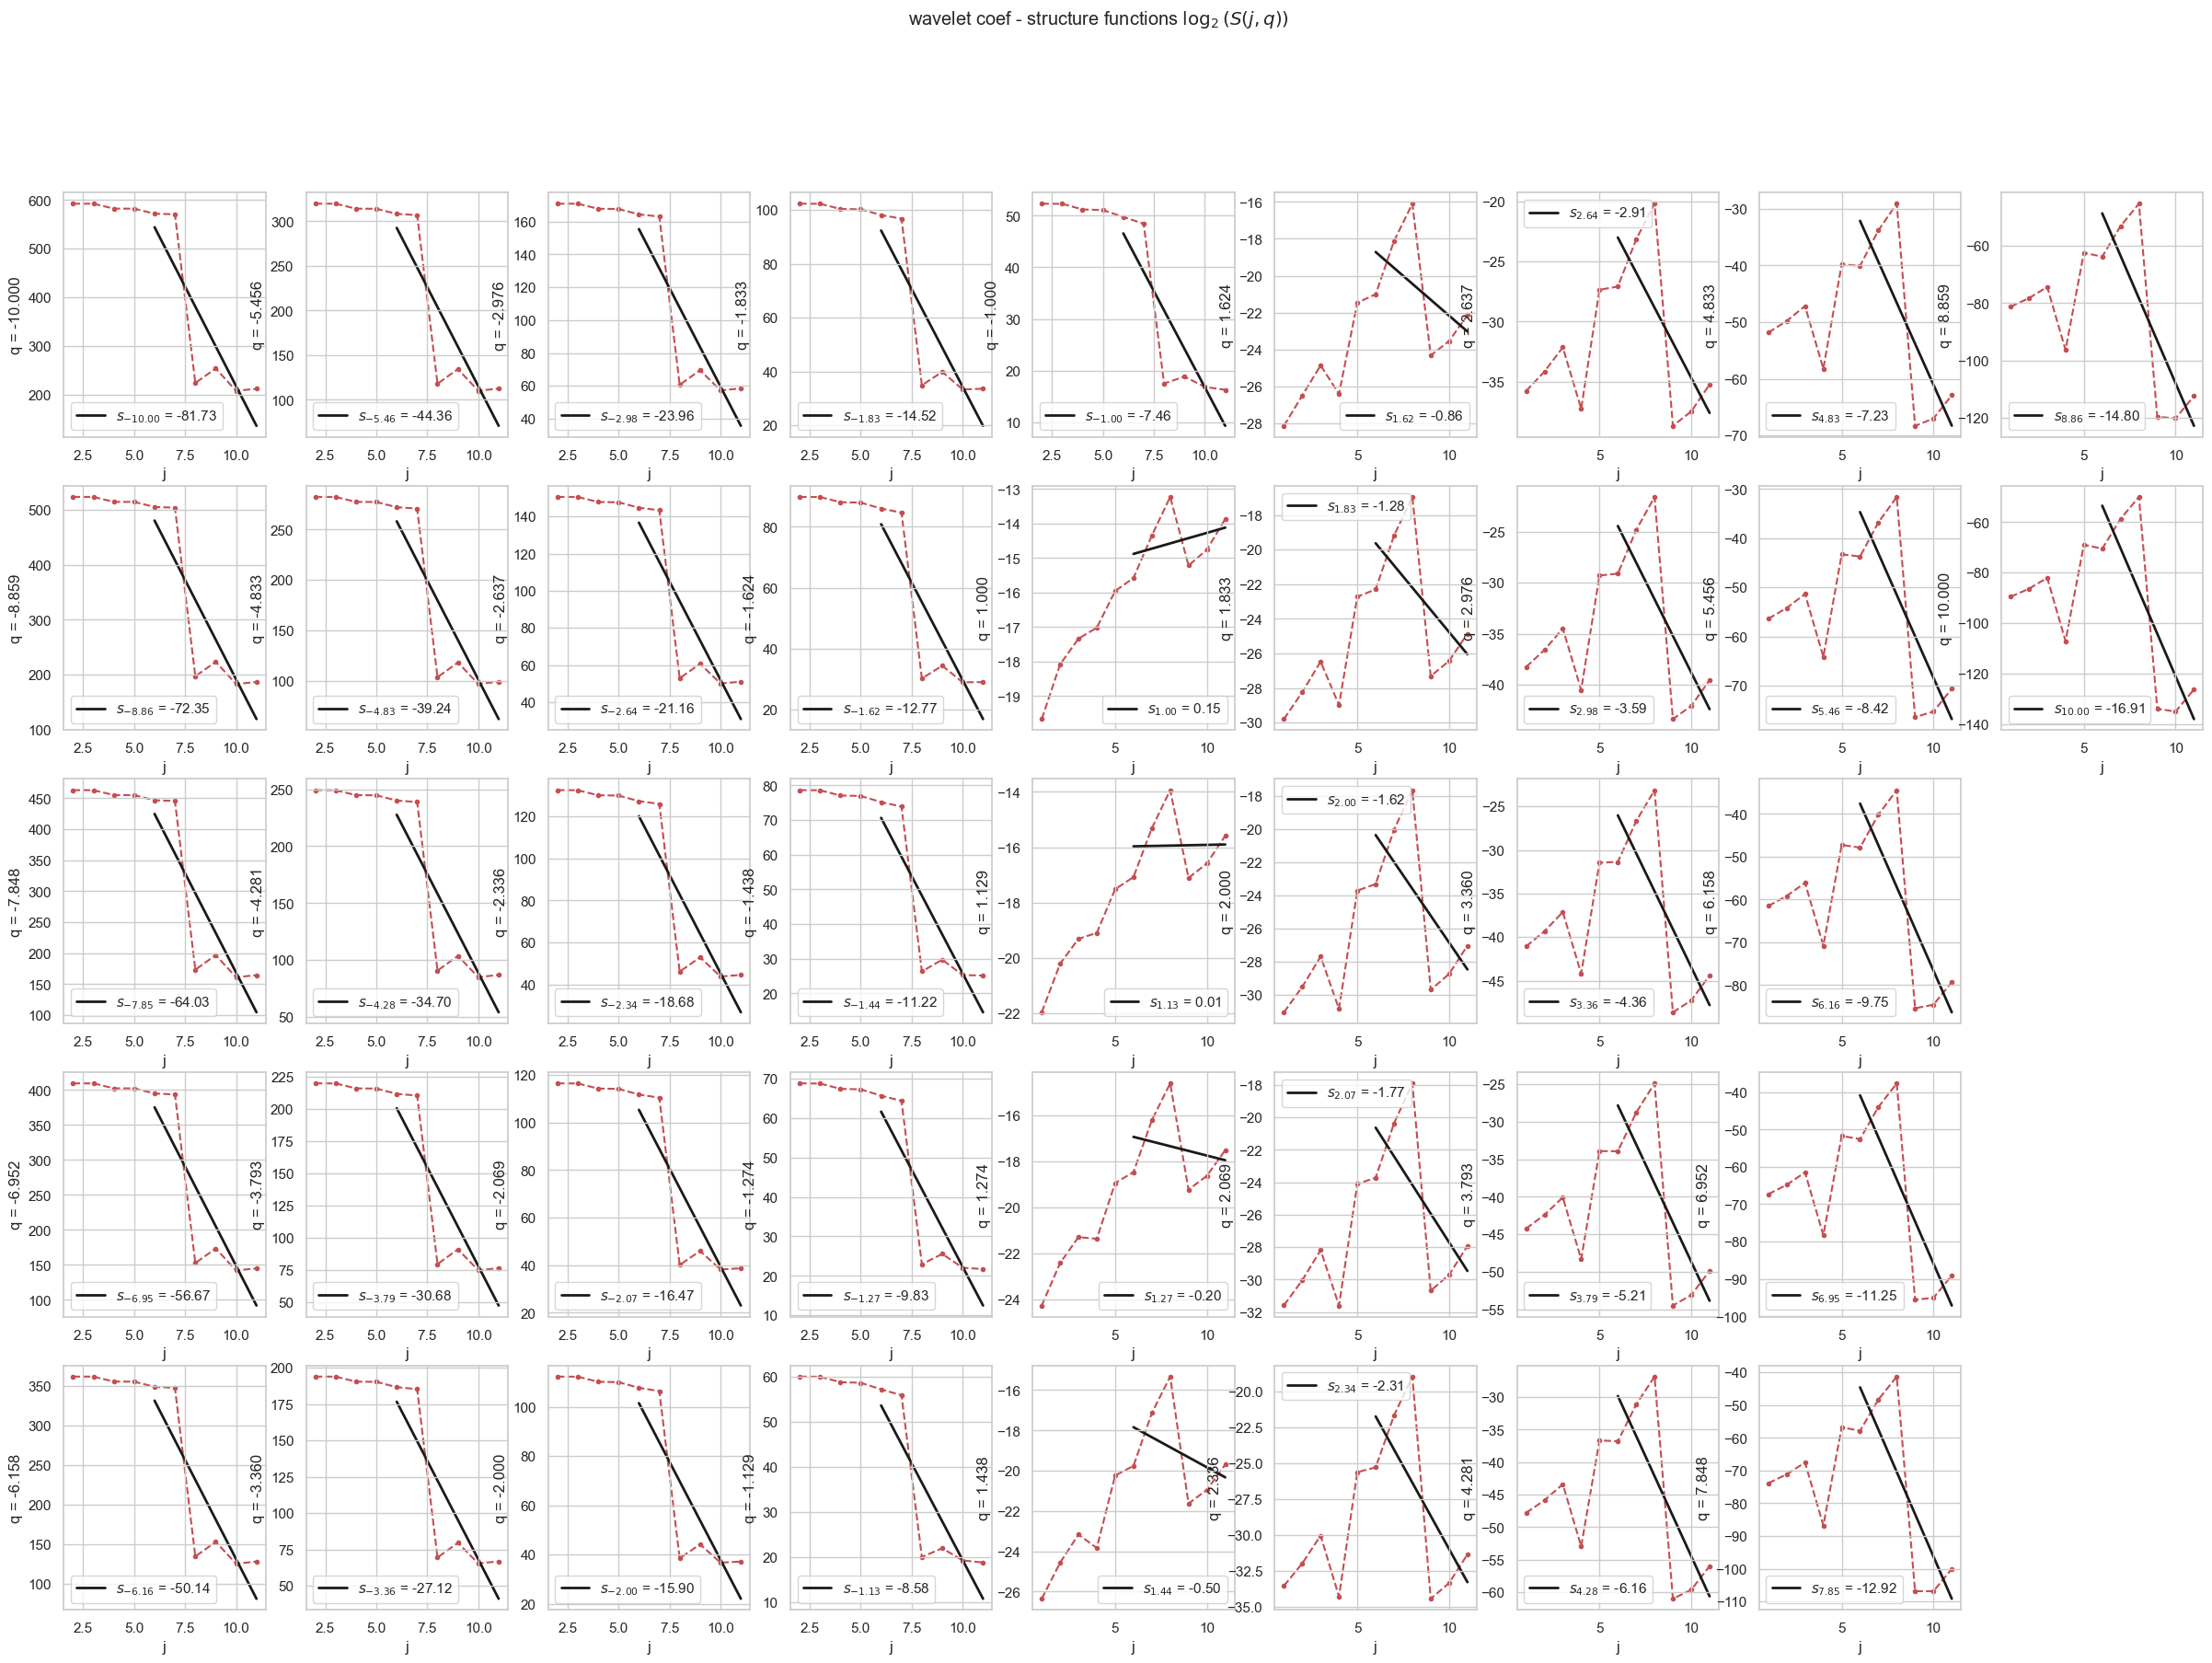

In [34]:
dwt.structure.H
dwt.structure.plot(nrow=5,figsize=(30,20))


# Ahpha and A estimation

In [87]:
! pip install git+https://github.com/orlando-romero/pyfracsys

80997.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Cloning https://github.com/orlando-romero/pyfracsys to /private/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/pip-req-build-w3yeyfue
  Running command git clone --filter=blob:none --quiet https://github.com/orlando-romero/pyfracsys /private/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/pip-req-build-w3yeyfue
  Resolved https://github.com/orlando-romero/pyfracsys to commit 464421397a1633707d5decaaec3926b2d6c07484
  Preparing metadata (setup.py) ... done
  Created wheel for pyfracsys: filename=pyfracsys-0.1-py3-none-any.whl size=5735 sha256=d6fb5162f3f8cdf8c22ada04e64979544ce101f23830e6245ba2e332a943bfe5
  Stored in directory: /private/var/folders/_t/wkz76zf10112hkp5k80v9w540000gp/T/pip-ephem-wheel-cache-dpn4ntnx/wheels/d8/26/95/5460a6371e6b95ac375ea4b9c86648884e577cbf21c7a67394
Successfully built pyfracsys


In [89]:
! pip install torchaudio

In [1]:
import torch
from pyfracsys import DTFOS

In [27]:
X = torch.from_numpy(f3_data)
X.shape
X= X.T

In [28]:
data = [X] # data must be a list of 2d torch tensors of shape (T, n)  = (num observations, num channels)

# Default fit methos uses OLS, but it tends to overfit
model = DTFOS(data, normalize_data=True) # by default, the the data will be internally normalized, but you can disable it
model.fit(alpha_min=1.0, alpha_max=2.0)

print(model.alpha, model.A) # this is, for now, an internal representation of the parameters, but they're padded and not meant to be directly accessed

Parameter containing:
tensor([[1.0008]], dtype=torch.float64, requires_grad=True) Parameter containing:
tensor([[[-2.4232e-05]]], dtype=torch.float64, requires_grad=True)


In [29]:
model.alpha

Parameter containing:
tensor([[1.0008]], dtype=torch.float64, requires_grad=True)

In [30]:
model.A

Parameter containing:
tensor([[[-2.4232e-05]]], dtype=torch.float64, requires_grad=True)

In [101]:
def mfda_features(X):
   
    dwt, lwt = mfa.mf_analysis_full(X,
    scaling_ranges=[[6,11]],
    q = build_q_log(1, 10, 20),
    n_cumul=2,
    p_exp=np.inf,
    gamint=0.5,
    weighted=False
)
    dwt_sf, dwt_cumul, dwt_mfs, hmin = dwt
    # print(dwt.hmin)
    # # dwt_sf.plot_scaling()
    # print("H is ",dwt.structure.H)
    # print("spectrum is", dwt.spectrum)
    
    # print(dir(dwt))
    # print((dwt.spectrum.q))
    # print(dir(dwt.spectrum))

    return dwt.structure.H,dwt.spectrum.Dq,dwt.spectrum.q

    
    

In [119]:
def featureExtractionPerSubject(root_path, channel,subject_id,session_id,eyes,type):

    if eyes == "EC":
        eyes = "EyesClosed"
    elif eyes == "EO":
        eyes= "EyesOpen"

    subject_str = f'sub-{subject_id:03d}'
    session_str = f'ses-{session_id:01d}'

    file_path = f'{subject_str}/{session_str}/eeg/{subject_str}_{session_str}_task-{eyes}_acq-{type}_eeg.edf'

    filePath = os.path.join(root_path, file_path)
    data = mne.io.read_raw_edf(filePath)

    channel_data,times = data[channel]
    return channel_data[0]



def load_data_all(root_path ,type,session_id):
    subjects_number = list(range(1,609))
    sessions_number = list(range(1,3))
    eyes_list = ["EC","EO"]
    type_list = ["pre","pos"]
    channels = "F3"

    session_data = []
    for subject_id in subjects_number:
        for eyes in eyes_list:
            data = featureExtractionPerSubject(root_path, channels, subject_id, session_id, eyes, type)
            session_data.append(data)            
    return session_data  
    

def featureExtraction_allsubject(session_data):
    Hs = []
    mfs_s =[]
    for dt in session_data[:100]:
       H,mfs,q = mfda_features(dt)
    #    print("mfs is",mfs)
       Hs.append(H)
       mfs_s.append(mfs)

    print("checkpoint A",len(mfs_s),len(mfs_s[0]),len(q),len(np.mean(mfs,axis=0)),len(np.mean(mfs,axis=0)[0])) 
    plt.plot(np.mean(mfs,axis=0)[0], q, marker='o', linestyle='-', color='b')
    plt.xlabel('q values')
    plt.ylabel('Mean values')
    plt.title('Mean of Array vs q values')
    plt.grid(True)
    plt.show()
    return Hs,np.mean(mfs,axis=0),q
             
def fit_alpha_A(session_data):
    for X in session_data[:100]:
        X = torch.from_numpy(X)
        X.shape
        X= X.T
        data = [X] 
        model = DTFOS(data, normalize_data=True)
        model.fit(alpha_min=1.0, alpha_max=2.0)
        print(model.alpha, model.A) 

In [ ]:
sesData = load_data_all(re_eeg_root_path,'pre',1)

/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/utils.py:87: RuntimeWarning: divide by zero encountered in power
  return np.power(array, exponent)
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/utils.py:76: RuntimeWarning: divide by zero encountered in reciprocal
  return array ** exponent
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/cumulants.py:265: RuntimeWarning: divide by zero encountered in log
  log_T_X_j = np.log(T_X_j)
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/mfspectrum.py:117: RuntimeWarning: invalid value encountered in divide
  R_j = temp / Z
/Users/athenasaghi/anaconda3/envs/CognitiveFatigue/lib/python3.11/site-packages/pymultifracs/mfspectrum.py:118: RuntimeWarning: divide by zero encountered in log2
  V[:, ind_j, :] = fixednansum(R_j * np.log2(mrq_values_j), axis=1)
/Users/athenasag

checkpoint A 100 43 43 1 1


ValueError: x and y must have same first dimension, but have shapes (1,) and (43,)

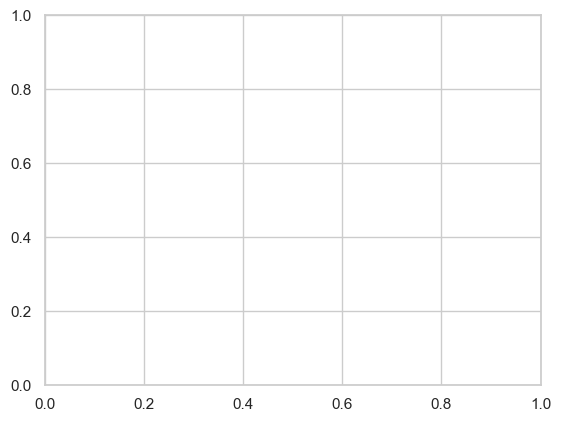

In [120]:
featureExtraction_allsubject(sesData)

In [121]:
fit_alpha_A([sesData])

TypeError: expected np.ndarray (got list)